# Example of how to Train a YOLOv8 Model

Change the api_key and project info as per your project

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qOVKfQdDMxOCTKWhpuay")
project = rf.workspace("joseph-nelson").project("bccd")
version = project.version(4)
dataset = version.download("yolov8")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# System Information (About GPU)
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
# Create a new YOLO model from scratch
model = YOLO("yolov8n.yaml")

# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 137MB/s]


In [13]:
import os

# List the files in the unzipped directory
unzipped_files = os.listdir('/content/BCCD-4')
print(unzipped_files)

['README.roboflow.txt', 'train', 'valid', 'README.dataset.txt', 'test', 'data.yaml']


In [21]:
results = model.train(
    data="/content/BCCD-4/data.yaml", epochs=10)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/BCCD-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/BCCD-4/train/labels... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<00:00, 1301.00it/s]


train: New cache created: /content/BCCD-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/BCCD-4/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 483.14it/s]

val: New cache created: /content/BCCD-4/valid/labels.cache


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train12
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.68G      1.422      2.213      1.502        140        640: 100%|██████████| 48/48 [00:26<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         73        967      0.821      0.611       0.72      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.16G      1.243      1.227      1.319        183        640: 100%|██████████| 48/48 [00:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         73        967      0.869      0.581       0.79      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.27G      1.224      1.114       1.29        163        640: 100%|██████████| 48/48 [00:16<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         73        967      0.668      0.812       0.84      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.18G      1.196      1.038      1.272        158        640: 100%|██████████| 48/48 [00:16<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         73        967      0.798      0.926        0.9      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.16G      1.176     0.9956      1.252        202        640: 100%|██████████| 48/48 [00:21<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         73        967      0.817      0.888      0.901      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.18G      1.164     0.9557      1.242        165        640: 100%|██████████| 48/48 [00:16<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


                   all         73        967       0.81      0.913      0.912      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.17G       1.13     0.9187      1.218        148        640: 100%|██████████| 48/48 [00:20<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         73        967      0.844      0.926       0.92       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.26G      1.114      0.884      1.212        156        640: 100%|██████████| 48/48 [00:21<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         73        967      0.811      0.922       0.91      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.16G      1.103     0.8671      1.195        144        640: 100%|██████████| 48/48 [00:15<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         73        967      0.848      0.895      0.901       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.16G      1.086     0.8399      1.184        126        640: 100%|██████████| 48/48 [00:15<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         73        967      0.838      0.909      0.913      0.642



10 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 6.2MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all         73        967      0.838      0.909      0.913      0.642
             Platelets         73         76      0.785      0.895       0.88      0.488
                   RBC         73        819      0.768      0.831      0.882      0.635
                   WBC         73         72      0.961          1      0.977      0.804
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/train12


In [22]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


image 1/1 /content/BCCD-4/test/images/BloodImage_00038_jpg.rf.ffa23e4b5b55b523367f332af726eae8.jpg: 640x640 2 Plateletss, 21 RBCs, 1 WBC, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


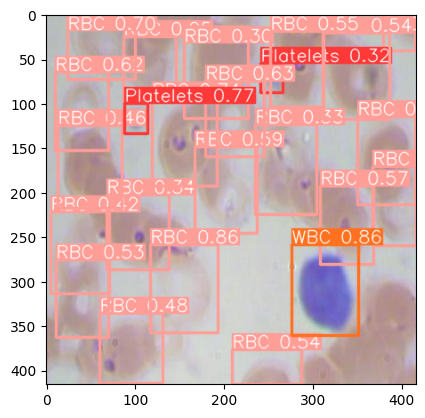

In [23]:

results = model('/content/BCCD-4/test/images/BloodImage_00038_jpg.rf.ffa23e4b5b55b523367f332af726eae8.jpg')
annotated_img = results[0].plot()
annotated_img =cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_img)
plt.show()